In [1]:
# Author:Zhang Yuan
from MyPackage import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

#------------------------------------------------------------
__mypath__ = MyPath.MyClass_Path("")  # 路径类
myfile = MyFile.MyClass_File()  # 文件操作类
myword = MyFile.MyClass_Word()  # word生成类
myexcel = MyFile.MyClass_Excel()  # excel生成类
mytime = MyTime.MyClass_Time()  # 时间类
myplt = MyPlot.MyClass_Plot()  # 直接绘图类(单个图窗)
mypltpro = MyPlot.MyClass_PlotPro()  # Plot高级图系列
myfig = MyPlot.MyClass_Figure(AddFigure=False)  # 对象式绘图类(可多个图窗)
myfigpro = MyPlot.MyClass_FigurePro(AddFigure=False)  # Figure高级图系列
mynp = MyArray.MyClass_NumPy()  # 多维数组类(整合Numpy)
mypd = MyArray.MyClass_Pandas()  # 矩阵数组类(整合Pandas)
mypdpro = MyArray.MyClass_PandasPro()  # 高级矩阵数组类
myDA = MyDataAnalysis.MyClass_DataAnalysis()  # 数据分析类
# myMql = MyMql.MyClass_MqlBackups() # Mql备份类
# myDefault = MyDefault.MyClass_Default_Matplotlib() # matplotlib默认设置
# myBaidu = MyWebCrawler.MyClass_BaiduPan() # Baidu网盘交互类
# myImage = MyImage.MyClass_ImageProcess()  # 图片处理类
myBT = MyBackTest.MyClass_BackTestEvent()  # 事件驱动型回测类
myBTV = MyBackTest.MyClass_BackTestVector()  # 向量型回测类
myML = MyMachineLearning.MyClass_MachineLearning()  # 机器学习综合类
mySQL = MyDataBase.MyClass_MySQL(connect=False)  # MySQL类
mySQLAPP = MyDataBase.MyClass_SQL_APPIntegration()  # 数据库应用整合
myWebQD = MyWebCrawler.MyClass_QuotesDownload(tushare=False)  # 金融行情下载类
myWebR = MyWebCrawler.MyClass_Requests()  # Requests爬虫类
myWebS = MyWebCrawler.MyClass_Selenium(openChrome=False)  # Selenium模拟浏览器类
myWebAPP = MyWebCrawler.MyClass_Web_APPIntegration()  # 爬虫整合应用类
myEmail = MyWebCrawler.MyClass_Email()  # 邮箱交互类
myReportA = MyQuant.MyClass_ReportAnalysis()  # 研报分析类
myFactorD = MyQuant.MyClass_Factor_Detection()  # 因子检测类
myKeras = MyDeepLearning.MyClass_tfKeras()  # tfKeras综合类
myTensor = MyDeepLearning.MyClass_TensorFlow()  # Tensorflow综合类
myMT5 = MyMql.MyClass_ConnectMT5(connect=False)  # Python链接MetaTrader5客户端类
myPjMT5 = MyProject.MT5_MLLearning()  # MT5机器学习项目类
#------------------------------------------------------------

c:\users\i2011\appdata\local\programs\python\python37\lib\site-packages\ffn\core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
c:\users\i2011\appdata\local\programs\python\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# ---获取数据
eurusd = myPjMT5.getsymboldata("EURUSD","TIMEFRAME_D1",[2010,1,1,0,0,0],[2020,1,1,0,0,0],index_time=True)

缺失值检查：
time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64


c:\users\i2011\appdata\local\programs\python\python37\lib\site-packages\MyPackage\MyMql\ConnectMT5.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate["rateInt"][np.isnan(rate["rate"])] = np.NAN
c:\users\i2011\appdata\local\programs\python\python37\lib\site-packages\MyPackage\MyMql\ConnectMT5.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate["rateInt"][rate["rate"] > 0] = 1
c:\users\i2011\appdata\local\programs\python\python37\lib\site-packages\MyPackage\MyMql\ConnectMT5.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [3]:
# ---计算信号，仅分析做多信号
price = eurusd.close   # 设定价格为考虑收盘价
%matplotlib inline

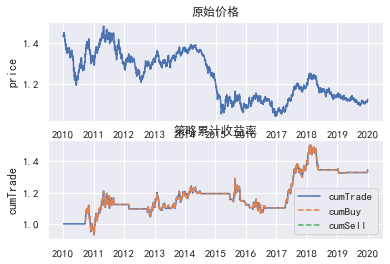

In [18]:
holding = 2
k = 105
# 获取信号数据
signaldata = myBTV.stra.momentum(price, k=k, holding=holding, sig_mode="BuyOnly", stra_mode="Continue")
# 信号分析
outStrat, outSignal = myBTV.signal_quality(signaldata["buysignal"], price_DataFrame=eurusd, holding=holding, lag_trade=1, plotRet=False, plotStrat=True)